In [61]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [62]:
def load_metrics_as_df(path_to_folder):
    merged_df = None
    files = glob.glob(os.path.join(path_to_folder, '*.csv'))
    for file in files:
        model_name = file.split('/')[-1][:-4]
        df = pd.read_csv(file)
        df.rename(columns={'Unnamed: 0': 'class'}, inplace=True)
        df.set_index('class', inplace=True)
        df_unstacked = df.unstack()
        df_unstacked = df_unstacked.swaplevel()
        df_unstacked = df_unstacked.sort_index()
        df_unstacked.index = df_unstacked.index.map(lambda x: f'{x[0]}_{x[1]}')
        df_flat = df_unstacked.to_frame().T
        df_flat.reset_index(drop=True, inplace=True)
        df_flat['model_name'] = model_name
        if type(merged_df) != None:
            merged_df = pd.concat([merged_df, df_flat])
        else:
            merged_df = df_flat.copy()
    return merged_df

In [63]:
val_path = '/Users/monaabd/Desktop/emotibit_model_data/validation/'
test_path = '/Users/monaabd/Desktop/emotibit_model_data/test/'
val_data = load_metrics_as_df(val_path)
test_data = load_metrics_as_df(test_path)

In [64]:
markers = {'2.5S': "o", '3S':"*", '3.5S': "d"}
pallette = {'16H_2L': "lightcoral", 
           '32H_2L': "lemonchiffon", 
           '64H_2L': "olive", 
           '16H_3L':"darkseagreen", 
           '32H_3L':"turquoise", 
           '64H_3L':"teal", 
           '16H_4L': "powderblue",
           '32H_4L': "dodgerblue",
           '64H_4L': "pink"}

In [69]:
val_filtered = val_data[val_data['Global_Accuracy'] >= 0.8]

Text(0.5, 1.0, 'Global vs Recall Class Recall on Validation Across Experiments')

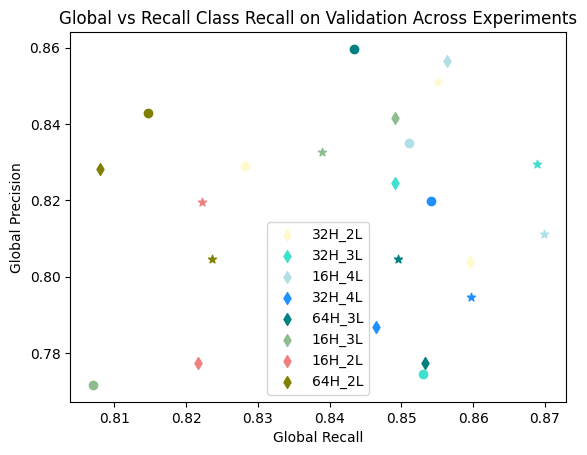

In [75]:
used_labels = set()
for i in range(len(val_filtered)):
    model_secs = val_filtered['model_name'].iloc[i].split('_')[0]
    model_hidden_dim_layer = val_filtered['model_name'].iloc[i].split('_')[1]+'_'+val_filtered['model_name'].iloc[i].split('_')[2]
    if model_hidden_dim_layer not in used_labels:
        plt.scatter(val_filtered['Global_Recall'].iloc[i], val_filtered['Recall Class_Recall'].iloc[i], 
                    color=pallette[model_hidden_dim_layer], label=model_hidden_dim_layer, marker=markers[model_secs])
        used_labels.add(model_hidden_dim_layer)
    else:
        plt.scatter(val_filtered['Global_Recall'].iloc[i], val_filtered['Recall Class_Recall'].iloc[i], 
                    color=pallette[model_hidden_dim_layer], marker=markers[model_secs])
plt.legend()
plt.xlabel('Global Recall')  # Assuming you want to label the x-axis
plt.ylabel('Global Precision')  # Assuming you want to label the y-axis
plt.title('Global vs Recall Class Recall on Validation Across Experiments')  # Assuming you want a title


In [66]:
test_data.sort_values('Recognition Familar Class_Accuracy')
test_data_filtered = test_data.loc[test_data['Recognition Familar Class_Accuracy']>= 0.8]
test_data_filtered.sort_values('model_name', inplace=True)
wanted_models = list(test_data_filtered['model_name'])
val_data_filtered = val_data[val_data['model_name'].isin(wanted_models)]
val_data_filtered.sort_values('model_name', inplace=True)

/var/folders/wz/qvqys7mx6pq7yyyz9b2_blnr0000gn/T/ipykernel_34147/3527101542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_filtered.sort_values('model_name', inplace=True)
/var/folders/wz/qvqys7mx6pq7yyyz9b2_blnr0000gn/T/ipykernel_34147/3527101542.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data_filtered.sort_values('model_name', inplace=True)


In [67]:
val_data_filtered = val_data_filtered[val_data_filtered['Recall Class_Accuracy'] >= 0.8]
wanted_models = list(val_data_filtered['model_name'])
test_data_filtered = test_data_filtered[test_data_filtered['model_name'].isin(wanted_models)]

In [68]:
for i in range(len(val_data_filtered)):
    model_secs = val_data_filtered['model_name'].iloc[i].split('_')[0]
    plt.scatter(val_data_filtered['Recognition Familar Class_Accuracy'].iloc[i], test_data_filtered['Recognition Familar Class_Accuracy'].iloc[i], color = pallette[model_secs])
    plt.text(val_data_filtered['Recognition Familar Class_Accuracy'].iloc[i], test_data_filtered['Recognition Familar Class_Accuracy'].iloc[i], val_data_filtered['model_name'].iloc[i])


KeyError: '3.5S'

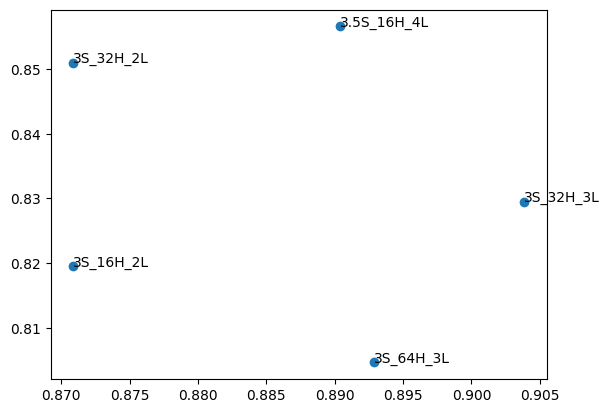

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(val_data_filtered['Recognition Familar Class_Accuracy'], val_data_filtered['Recall Class_Accuracy'])
for i in range(len(val_data_filtered)):
    plt.text(val_data_filtered['Recognition Familar Class_Accuracy'].iloc[i], val_data_filtered['Recall Class_Accuracy'].iloc[i], val_data_filtered['model_name'].iloc[i])
